In [ ]:
"""
케라스 RNN 신경망 : SimpleRNN, LSTM, GRU
입력형식
LSTM(3, input_dim=1, input_length=4)
3: 메모리 셀의 개수(Dense에서 출력뉴런수와 같은 의미)
input_dim은 입력 속성의 개수
input_length은 시퀀스 데이터의 입력 길이
ex)
hihell -> ihello

return_sequences: 시퀀스 출력 여부(True/False)
many to many: return_sequences=True
many to one: return_sequences=False

stateful : 상태유지 모드
현재 샘플의 마지막 셀의 상태가 다음 샘플의 입력으로 전달할 것인지 여부를 지정

"""

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
def MinMaxScaler(data):
    #정규화
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom    

In [23]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1] #역순으로 저장

In [35]:
seqLength=7 #window size -> 일주일 단위로 train
dataDim=5 #시가,종가... 거래량 -> 5개 컬럼
hiddenDim=10
outputDim=1
lr=0.01
iterations=500

In [27]:
#train/test set 나누기
trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize] #0:499
testSet = xy[trainSize-seqLength:] #493:499 -> 500

In [28]:
trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)

In [29]:
def buildDataSet(timeSeries, seqLength):
    xdata=[]
    ydata=[]
    for i in range(0,len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength,:]
        ty = timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [30]:
trainX, trainY = buildDataSet(trainSet, seqLength)
testX, testY = buildDataSet(testSet, seqLength)

In [32]:
trainX.shape # (505, 7, 5) -> 505개 샘플, 7(일주일), 5(5개 컬럼)

(505, 7, 5)

In [34]:
x = tf.placeholder(tf.float32, [None,seqLength,dataDim])
y = tf.placeholder(tf.float32, [None,1])

In [37]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hiddenDim, state_is_tuple=True,
                                   #is_tuple=True => ([1,2],[3,4])  출력 결과를 tuple로 묶어줌
                                   #is_tuple=False => 텐서 = [1,2,3,4]
                                   activation=tf.tanh)

In [38]:
outputs, _states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
yhat = tf.contrib.layers.fully_connected(outputs[:,-1], outputDim, activation_fn=None)

In [42]:
loss = tf.reduce_mean(tf.square(yhat-y))
opt = tf.train.AdamOptimizer(lr)
train = opt.minimize(loss)

### rmse

In [46]:
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions)))

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _,cv = sess.run([train, loss], feed_dict={x:trainX, y:trainY})
        print("step:{} loss:{}".format(i,cv))
    testPredict = sess.run(yhat, feed_dict={x:testX})
    rmsev = sess.run(rmse, feed_dict={targets:testY, predictions:testPredict})
    print("rmse value:{}".format(rmsev))

step:0 loss:0.3000373840332031
step:1 loss:0.19610416889190674
step:2 loss:0.12111852318048477
step:3 loss:0.07008188962936401
step:4 loss:0.03864505514502525
step:5 loss:0.02332935854792595
step:6 loss:0.02069295197725296
step:7 loss:0.026091894134879112
step:8 loss:0.03367587551474571
step:9 loss:0.03859874978661537
step:10 loss:0.038869861513376236
step:11 loss:0.03503040596842766
step:12 loss:0.028791407123208046
step:13 loss:0.0219519454985857
step:14 loss:0.015875082463026047
step:15 loss:0.011347497813403606
step:16 loss:0.008628791198134422
step:17 loss:0.007571529131382704
step:18 loss:0.007757699582725763
step:19 loss:0.008633662946522236
step:20 loss:0.009637895971536636
step:21 loss:0.010312004014849663
step:22 loss:0.010377828031778336
step:23 loss:0.009765177965164185
step:24 loss:0.008588551543653011
step:25 loss:0.0070868851616978645
step:26 loss:0.00554758682847023
step:27 loss:0.0042343526147305965
step:28 loss:0.0033322859089821577
step:29 loss:0.002917251316830516
s

step:271 loss:0.0018980619497597218
step:272 loss:0.0018952260725200176
step:273 loss:0.0018924032337963581
step:274 loss:0.001889593550004065
step:275 loss:0.001886796555481851
step:276 loss:0.0018840127158910036
step:277 loss:0.0018812419148162007
step:278 loss:0.001878484501503408
step:279 loss:0.0018757397774606943
step:280 loss:0.0018730077426880598
step:281 loss:0.0018702888628467917
step:282 loss:0.0018675823230296373
step:283 loss:0.001864888472482562
step:284 loss:0.0018622076604515314
step:285 loss:0.0018595390720292926
step:286 loss:0.0018568832892924547
step:287 loss:0.0018542397301644087
step:288 loss:0.0018516085110604763
step:289 loss:0.001848989282734692
step:290 loss:0.001846382045187056
step:291 loss:0.0018437867984175682
step:292 loss:0.0018412034260109067
step:293 loss:0.0018386319279670715
step:294 loss:0.0018360717222094536
step:295 loss:0.0018335229251533747
step:296 loss:0.0018309853039681911
step:297 loss:0.001828458858653903
step:298 loss:0.0018259432399645448

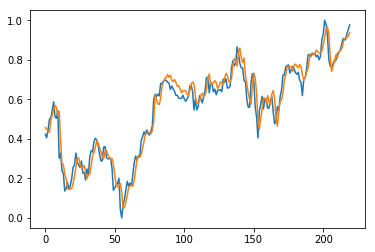

In [51]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()